# Citi Bike Project

## Import Packages

In [38]:
import requests

import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from geodatasets import get_path

plt.style.use('ggplot')

In [39]:
pd.__version__

'2.2.2'

## Loading trip data

In [2]:
df = pd.read_csv('../data/202405-citibike-tripdata/202405-citibike-tripdata_1.csv')

/var/folders/st/m0b_93g97bxcmqnsx5v2qdm00000gn/T/ipykernel_10115/4292729557.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/202405-citibike-tripdata/202405-citibike-tripdata_1.csv')


In [3]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,FE6A074FC945A086,electric_bike,2024-05-01 08:05:53,2024-05-01 08:15:14,1 Ave & E 30 St,6079.03,E 74 St & 1 Ave,6953.08,40.741509,-73.975355,40.768974,-73.954823,member
1,6844CF42F72827D7,classic_bike,2024-05-10 15:00:06,2024-05-10 15:08:58,31 Ave & 57 St,6621.06,31 Ave & Steinway St,6782.01,40.757357,-73.904726,40.761149,-73.917007,member
2,D7C9E007F791A7A2,classic_bike,2024-05-06 12:28:39,2024-05-06 12:35:21,E 89 St & 3 Ave,7265.10,E 80 St & 2 Ave,7121.02,40.780628,-73.952167,40.773914,-73.954395,member
3,3419650E2F5999F1,classic_bike,2024-05-16 16:09:14,2024-05-16 16:14:20,E 89 St & 3 Ave,7265.10,E 80 St & 2 Ave,7121.02,40.780628,-73.952167,40.773914,-73.954395,member
4,5469FDC75E0F1FCA,electric_bike,2024-05-29 15:43:37,2024-05-29 15:49:27,1 Ave & E 30 St,6079.03,E 45 St & 3 Ave,6464.08,40.741444,-73.975361,40.752554,-73.972826,member


In [6]:
# get the stations information

req = requests.get("https://gbfs.lyft.com/gbfs/2.3/bkn/en/station_information.json")

<Axes: xlabel='lon', ylabel='lat'>

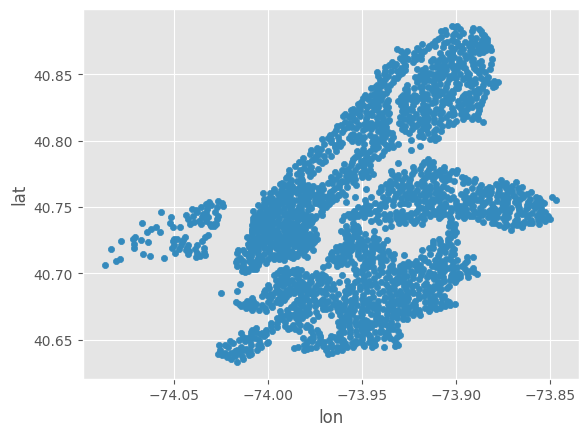

In [7]:
pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']].plot.scatter(x='lon', y='lat')

In [9]:
nyc = gpd.read_file(get_path('nybb'))
nybb = nyc.to_crs(32619)

In [10]:
pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']].head()

,lon,lat
0,-74.013181,40.703662
1,-73.989873,40.738661
2,-74.003140,40.723230
3,-73.908351,40.819890
4,-74.013318,40.642408


<Axes: >

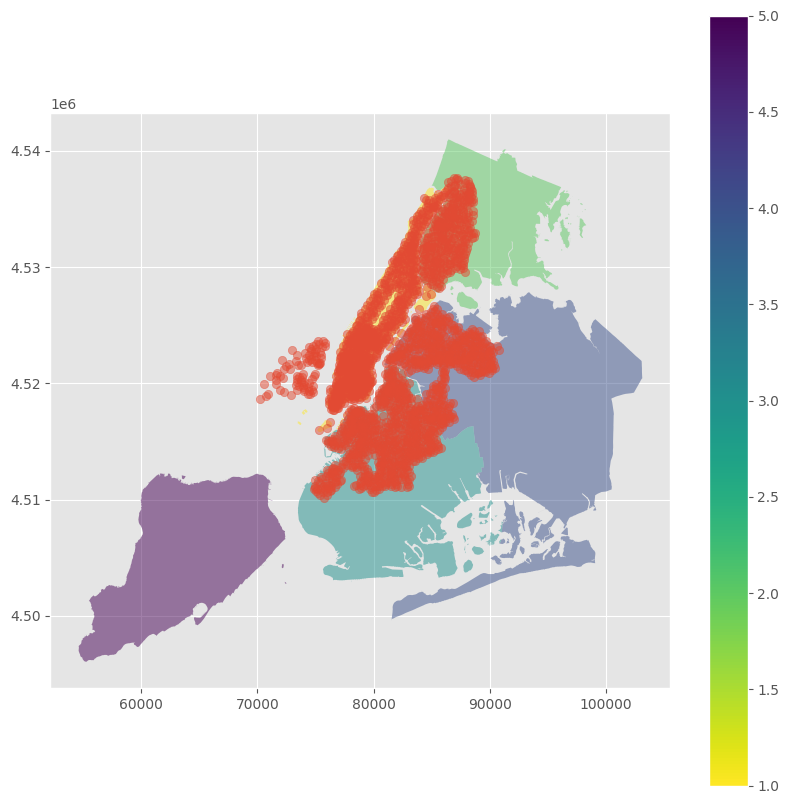

In [12]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
nybb.plot(column='BoroCode', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
#pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']].plot.scatter(x='lon', y='lat', ax=ax)

dd = pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']]

gdf = gpd.GeoDataFrame(
    dd, geometry=gpd.points_from_xy(dd.lon, dd.lat), crs="EPSG:4326").to_crs(32619)
gdf.plot(ax=ax, alpha= 0.5)
# plt.xlim(74000, 90000)
# plt.ylim(4.51e6, 4.55e6)

In [22]:
nybb

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((72387.313 4502901.349, 72390.3..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((90672.492 4505050.592, 90663.5..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((88021.476 4503764.521, 87967.7..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((76488.408 4515823.054, 76399.6..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((86828.383 4527641.247, 86816.3..."


In [21]:
nybb.loc[3, 'geometry'].contains(gdf.loc[0, 'geometry'])

True

In [25]:
gdf

,lon,lat,geometry
0,-74.013181,40.703662,POINT (76419.706 4517963.133)
1,-73.989873,40.738661,POINT (78611.277 4521737.945)
2,-74.003140,40.723230,POINT (77392.563 4520088.024)
3,-73.908351,40.819890,POINT (86004.266 4530370.474)
4,-74.013318,40.642408,POINT (76019.185 4511160.507)
...,...,...,...
2211,-74.042521,40.740802,POINT (74177.211 4522230.533)
2212,-74.038914,40.718355,POINT (74338.451 4519719.866)
2213,-74.048790,40.725685,POINT (73550.791 4520582.082)
2214,-74.046964,40.735208,POINT (73766.085 4521630.881)


In [27]:
for idx, row in nybb.iterrows():
    gdf[row['BoroName']] = row['geometry'].contains(gdf['geometry'])
    #print(row)

In [28]:
gdf

,lon,lat,geometry,Staten Island,Queens,Brooklyn,Manhattan,Bronx
0,-74.013181,40.703662,POINT (76419.706 4517963.133),False,False,False,True,False
1,-73.989873,40.738661,POINT (78611.277 4521737.945),False,False,False,True,False
2,-74.003140,40.723230,POINT (77392.563 4520088.024),False,False,False,True,False
3,-73.908351,40.819890,POINT (86004.266 4530370.474),False,False,False,False,True
4,-74.013318,40.642408,POINT (76019.185 4511160.507),False,False,True,False,False
...,...,...,...,...,...,...,...,...
2211,-74.042521,40.740802,POINT (74177.211 4522230.533),False,False,False,False,False
2212,-74.038914,40.718355,POINT (74338.451 4519719.866),False,False,False,False,False
2213,-74.048790,40.725685,POINT (73550.791 4520582.082),False,False,False,False,False
2214,-74.046964,40.735208,POINT (73766.085 4521630.881),False,False,False,False,False


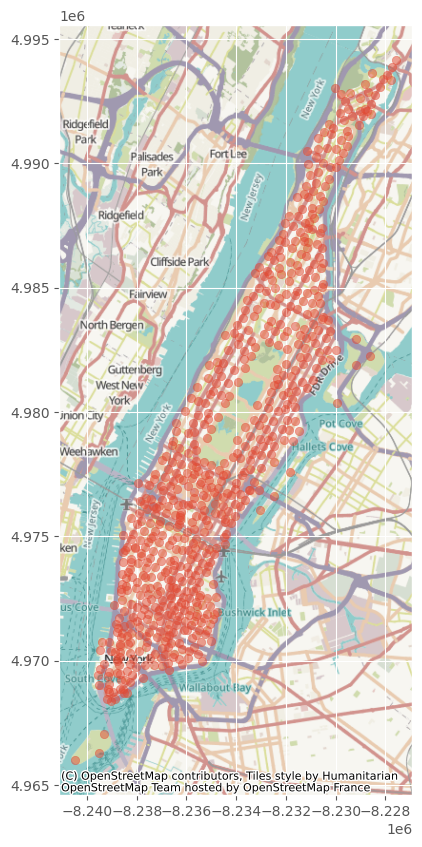

In [36]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
# nybb.plot(column='BoroCode', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
#pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']].plot.scatter(x='lon', y='lat', ax=ax)

dd = pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']]

gdf.loc[gdf['Manhattan']].to_crs(3857).plot(ax=ax, alpha=0.5)
cx.add_basemap(ax)

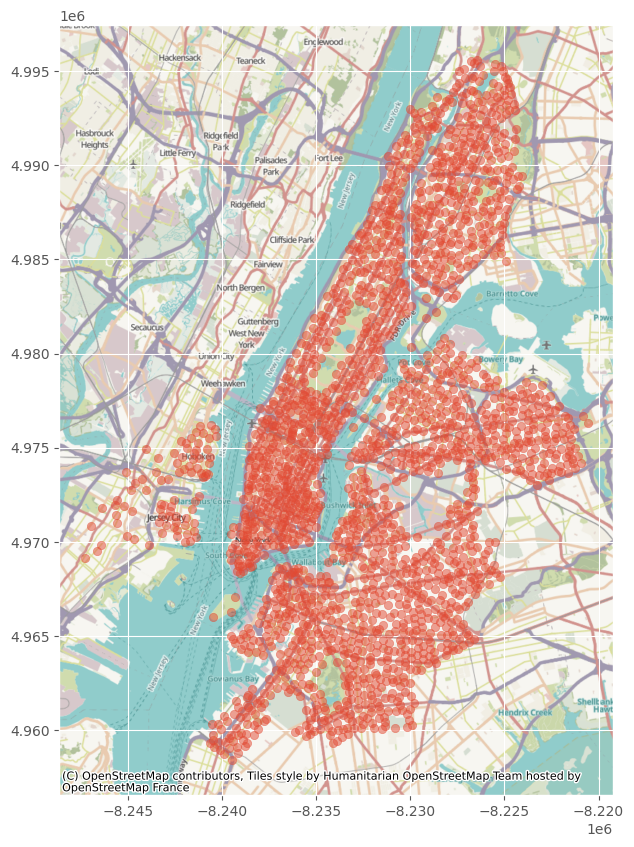

In [40]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
# nybb.plot(column='BoroCode', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
#pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']].plot.scatter(x='lon', y='lat', ax=ax)

dd = pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']]

gdf.to_crs(3857).plot(ax=ax, alpha=0.5)
cx.add_basemap(ax)

In [42]:
ngbhoods = gpd.read_file(
    "../data/CHS_2009_DOHMH_2010B/CHS_2009_DOHMH_2010B.shp"
)[["geometry", "FIRST_UHF_", "UHF_CODE"]]

<Axes: >

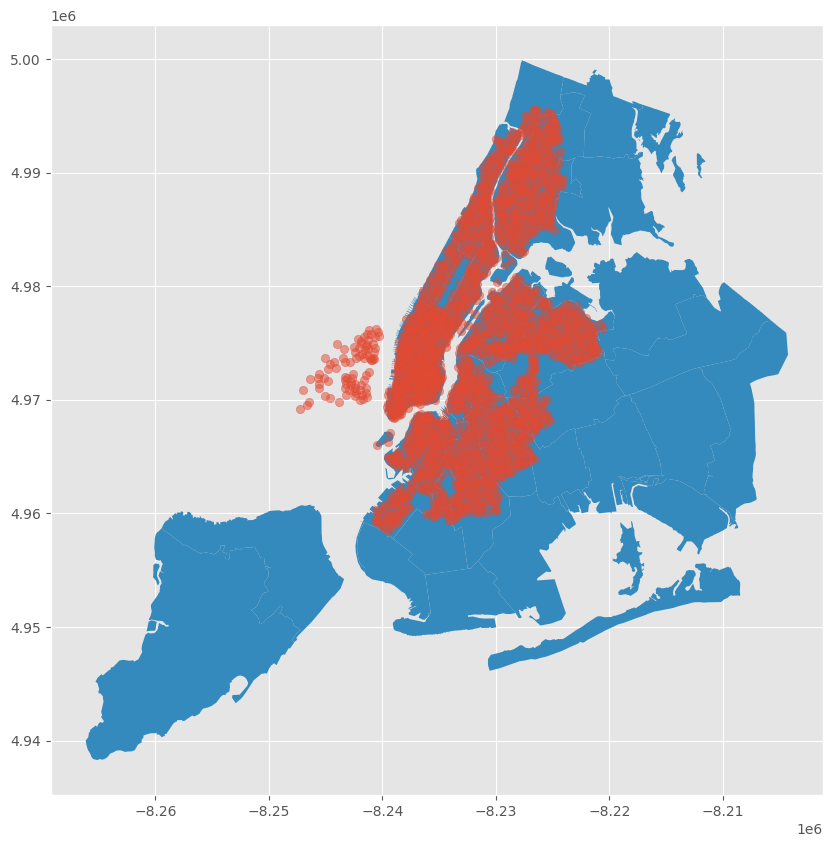

In [48]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
ngbhoods.to_crs(3857).plot(ax=ax)
gdf.to_crs(3857).plot(ax=ax, alpha=0.5)

In [53]:
ngbhoods = gpd.read_file(
    "../data/jersey_city_neighborhoods/Neighborhoods.shp"
)

In [54]:
ngbhoods

,Id,area,geometry
0,0,Downtown,"POLYGON ((622384.941 683694.838, 615783.642 68..."
1,0,The Heights,"POLYGON ((616434.791 691463.714, 614907.96 693..."
2,0,West Side,"POLYGON ((612236.005 694539.83, 611786.937 693..."
3,0,Journal Square,"POLYGON ((616434.791 691463.714, 615940.816 68..."
4,0,Bergen-Lafayette,"POLYGON ((610984.666 689874.738, 611831.844 68..."
5,0,Greenville,"POLYGON ((602670.857 686748.5, 607677.965 6850..."
6,0,Meadowlands,"POLYGON ((607835.139 694831.724, 609098.805 69..."
7,0,Liberty State Park,"POLYGON ((622384.941 683694.838, 622256.817 68..."
8,0,Port Industrial Area,"POLYGON ((615732.789 676466.007, 612983.901 66..."


<Axes: >

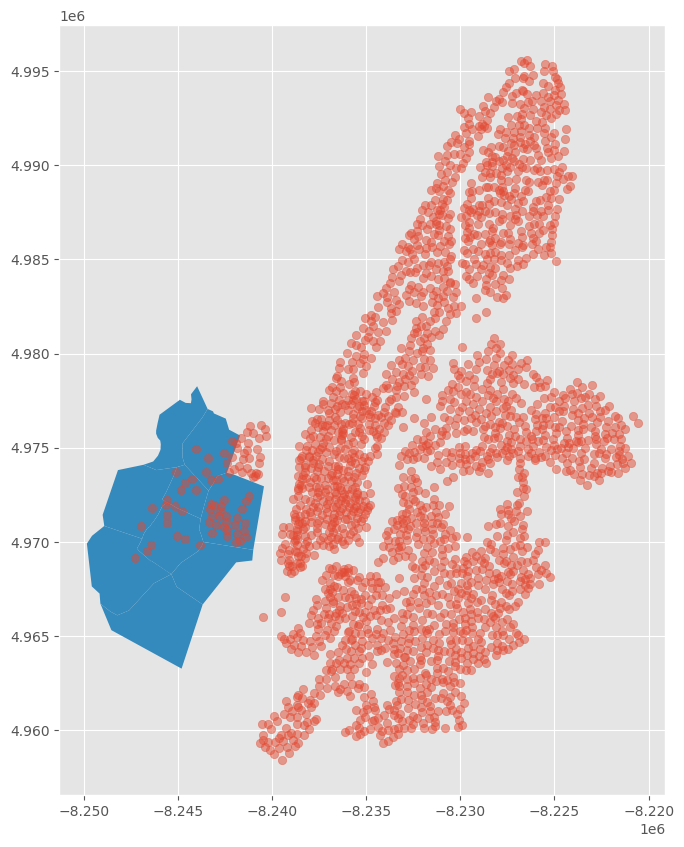

In [52]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
ngbhoods.to_crs(3857).plot(ax=ax)
gdf.to_crs(3857).plot(ax=ax, alpha=0.5)